In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv("powerconsumption.csv")
df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [15]:
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

In [16]:
## Feature Engineering extracts the hour, day of the week, quarter, month etc. from the datetime index

def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

In [17]:
df.columns

Index(['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2',
       'PowerConsumption_Zone3', 'hour', 'dayofweek', 'quarter', 'month',
       'year', 'dayofyear', 'dayofmonth', 'weekofyear'],
      dtype='object')

# Downcast Dtype

In [ ]:
#df.info()

In [8]:
import pandas as pd
import numpy as np

def reduce_mem_usage(df):
    """
    Iterate through all the columns of a dataframe and modify the data type
    to reduce memory usage.
    """
    # Calculate the initial memory usage of the DataFrame
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of the dataframe is {:.2f} MB'.format(start_mem))
    
    # Iterate through each column of the DataFrame
    for column in df.columns:
        # Get the current data type of the column
        col_type = df[column].dtype
        
        # Check if the column is not an object (i.e., numeric)
        if col_type != object:
            # Get the minimum and maximum values of the column
            c_min = df[column].min()
            c_max = df[column].max()
            
            # Check if the data type is integer
            if str(col_type)[:3] == 'int':
                # Downcast the column to the smallest integer type if its values are within the range
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[column] = df[column].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[column] = df[column].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[column] = df[column].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[column] = df[column].astype(np.int64)
            # Check if the data type is floating-point
            elif str(col_type)[:3] == 'flo':
                # Downcast the column to the smallest floating-point type if its values are within the range
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[column] = df[column].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[column] = df[column].astype(np.float32)
                else:
                    df[column] = df[column].astype(np.float64)
        # Convert datetime columns to datetime dtype
        elif col_type == 'object':
            # Check if the column can be converted to datetime
            try:
                df[column] = pd.to_datetime(df[column])
            except ValueError:
                df[column] = df[column].astype('category')
    
    # Calculate the final memory usage of the DataFrame
    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


In [9]:
df1 = reduce_mem_usage(df)

Memory usage of the dataframe is 6.65 MB
Memory usage after optimization is: 1.90 MB
Decreased by 71.4%


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52416 entries, 2017-01-01 00:00:00 to 2017-12-30 23:50:00
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature             52416 non-null  float64
 1   Humidity                52416 non-null  float64
 2   WindSpeed               52416 non-null  float64
 3   GeneralDiffuseFlows     52416 non-null  float64
 4   DiffuseFlows            52416 non-null  float64
 5   PowerConsumption_Zone1  52416 non-null  float64
 6   PowerConsumption_Zone2  52416 non-null  float64
 7   PowerConsumption_Zone3  52416 non-null  float64
 8   hour                    52416 non-null  int64  
 9   dayofweek               52416 non-null  int64  
 10  quarter                 52416 non-null  int64  
 11  month                   52416 non-null  int64  
 12  year                    52416 non-null  int64  
 13  dayofyear               52416 non-null  int64  
 14  day

In [19]:
# df['Date'] = df['Datetime'].dt.date
# df['Time'] = df['Datetime'].dt.time

In [20]:
#df1 = df.drop("Datetime", axis = 1)
#df1['Date'] = pd.to_datetime(df1['Date'])
#df1['Time'] = pd.to_datetime(df1['Time'])

In [21]:
#Calculating 10-day, 15-day and 30-day Simple Moving Average

df['SMA10'] = df['PowerConsumption_Zone1'].rolling(10).mean()
df['SMA15'] = df['PowerConsumption_Zone1'].rolling(15).mean()
df['SMA30'] = df['PowerConsumption_Zone1'].rolling(30).mean()

df.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,SMA10,SMA15,SMA30
Datetime,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0,6,1,1,2017,1,1,52,NaN,NaN,NaN
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,0,6,1,1,2017,1,1,52,NaN,NaN,NaN
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,0,6,1,1,2017,1,1,52,NaN,NaN,NaN
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,0,6,1,1,2017,1,1,52,NaN,NaN,NaN
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,0,6,1,1,2017,1,1,52,NaN,NaN,NaN


In [84]:
#Calculating 10-day, 15-day and 30-day Simple Moving Average

df['SMA10'] = df['PowerConsumption_Zone1'].rolling(10).mean()
df['SMA15'] = df['PowerConsumption_Zone1'].rolling(15).mean()
df['SMA30'] = df['PowerConsumption_Zone1'].rolling(30).mean()

df.head()


,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,SMA10,SMA15,SMA30
Datetime,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0,6,1,1,2017,1,1,52,NaN,NaN,NaN
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,0,6,1,1,2017,1,1,52,NaN,NaN,NaN
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,0,6,1,1,2017,1,1,52,NaN,NaN,NaN
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,0,6,1,1,2017,1,1,52,NaN,NaN,NaN
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,0,6,1,1,2017,1,1,52,NaN,NaN,NaN


# EDA

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

def plot(data, plot_type, *features):
    sns.set(style='ticks', palette='Set3', font='Calibri')
    sns.set_context("paper", rc={"lines.linewidth": 1.5, "axes.labelsize": 14, "xtick.labelsize": 12, "ytick.labelsize": 12})

    num_plots = len(features)
    num_cols = math.ceil(math.sqrt(num_plots))
    num_rows = math.ceil(num_plots / num_cols)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        ax = axes[i]
        if plot_type == 'histplot':
            sns.histplot(data=data, x=feature, bins=10, kde=True, ax=ax, color='steelblue')
        elif plot_type == 'boxplot':
            sns.boxplot(data=data, x=feature, ax=ax, color='lightgray', linewidth=0.8)
        elif plot_type == 'violinplot':
            sns.violinplot(data=data, x=feature, ax=ax, palette='pastel', inner='quartile')
        ax.set_title(feature)

    # Remove any unused subplots
    if len(features) < len(axes):
        for j in range(len(features), len(axes)):
            fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


In [23]:
df1.columns

Index(['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2',
       'PowerConsumption_Zone3', 'hour', 'dayofweek', 'quarter', 'month',
       'year', 'dayofyear', 'dayofmonth', 'weekofyear'],
      dtype='object')

<AxesSubplot:>

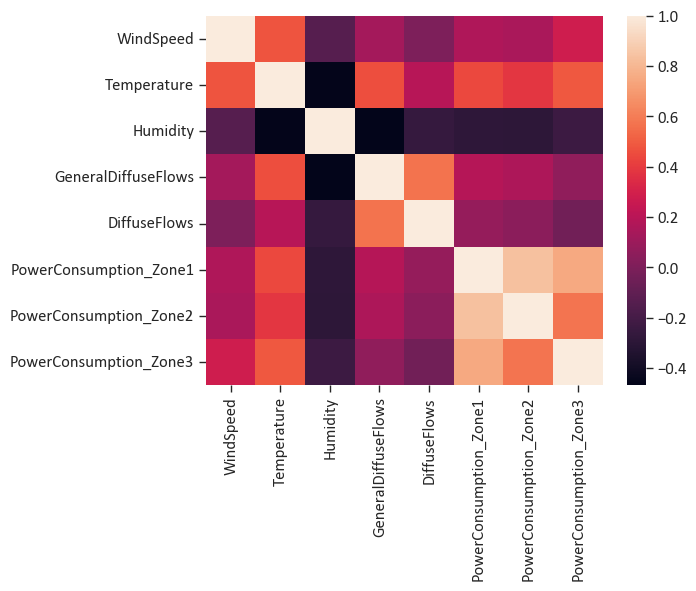

In [32]:
columns = ['WindSpeed', 'Temperature', 'Humidity', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2',
       'PowerConsumption_Zone3']

corr_matrix = df1[columns].corr()
df1[columns].corr()
sns.heatmap(corr_matrix)

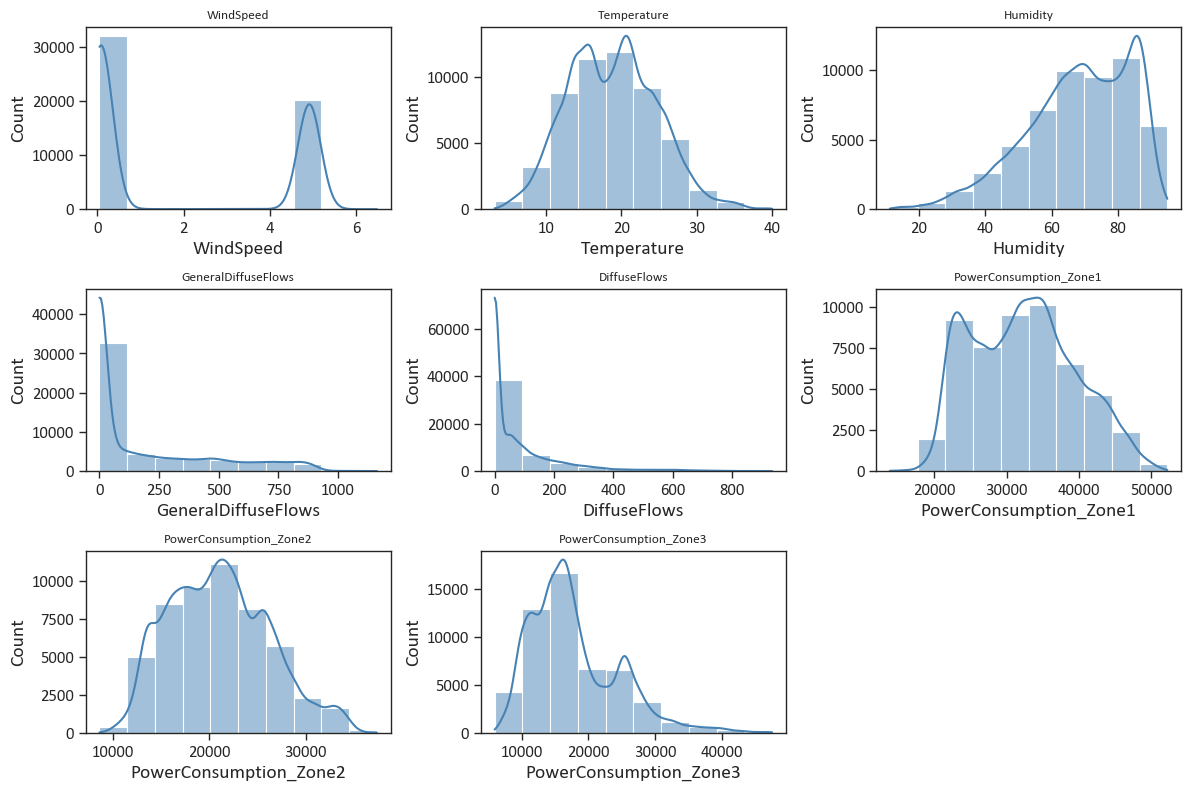

In [24]:
#univariate analysis

plot(df1, 'histplot', 'WindSpeed', 'Temperature', 'Humidity', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2',
       'PowerConsumption_Zone3')

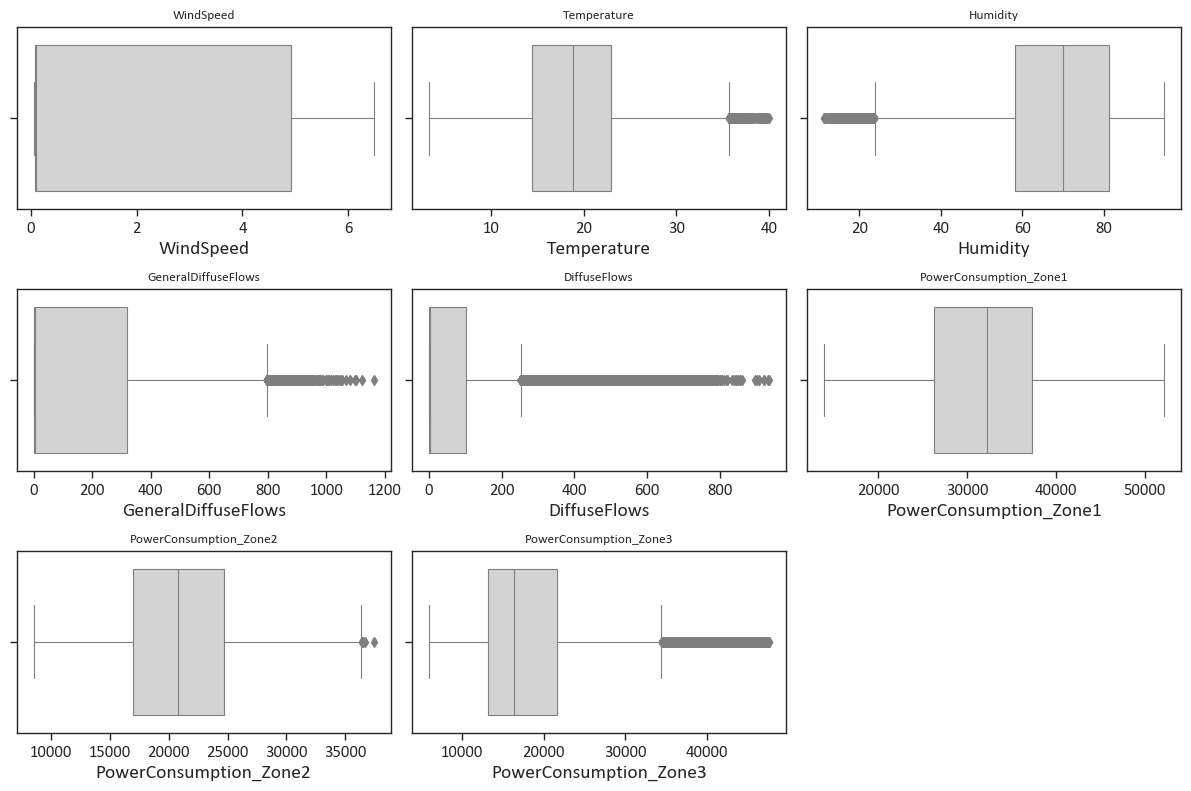

In [25]:
plot(df1, 'boxplot', 'WindSpeed', 'Temperature', 'Humidity', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2',
       'PowerConsumption_Zone3')

<AxesSubplot:xlabel='Temperature', ylabel='PowerConsumption_Zone1'>

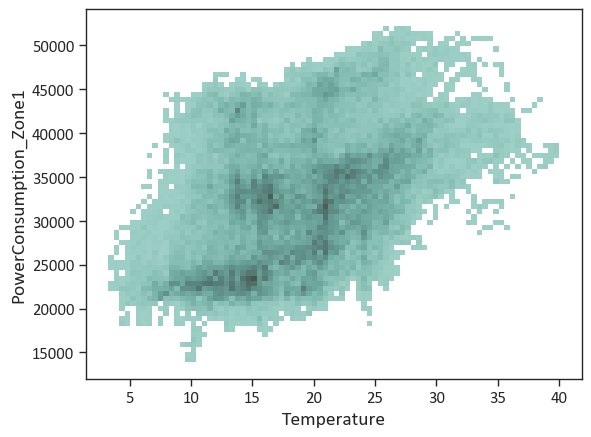

In [26]:
sns.histplot(data = df,
              x='Temperature',
              y='PowerConsumption_Zone1',
           fill=True)

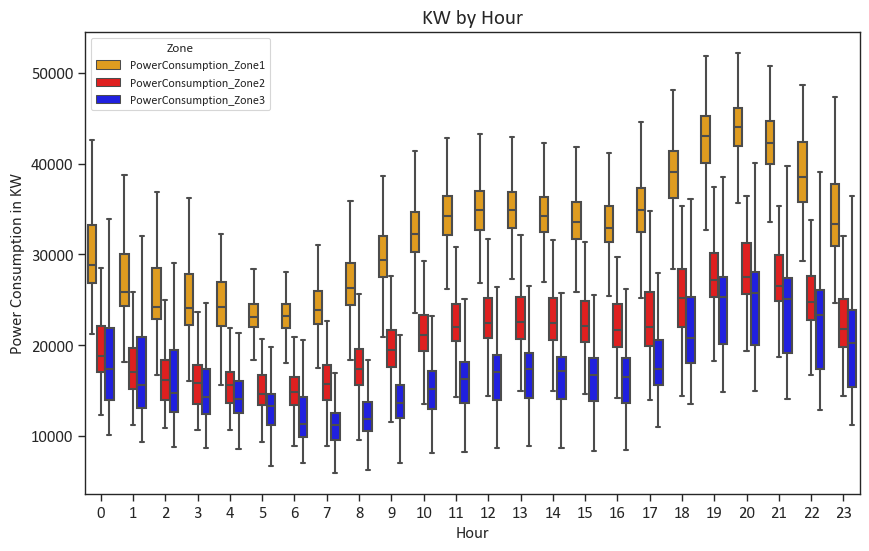

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# Combine the data from three columns into a single column for boxplot
df_melt = df.melt(id_vars='hour', value_vars=['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3'], var_name='Zone')

# Create the boxplot with hue parameter
sns.boxplot(data=df_melt, x='hour', y='value', hue='Zone', palette=['orange', 'red', 'blue'], showfliers=False, ax=ax)

ax.set_title('KW by Hour', fontsize=15)
ax.set_xlabel('Hour', fontsize=12)
ax.set_ylabel('Power Consumption in KW', fontsize=12)
ax.tick_params(labelsize=12)

# Add legend
ax.legend(title='Zone')

plt.show()


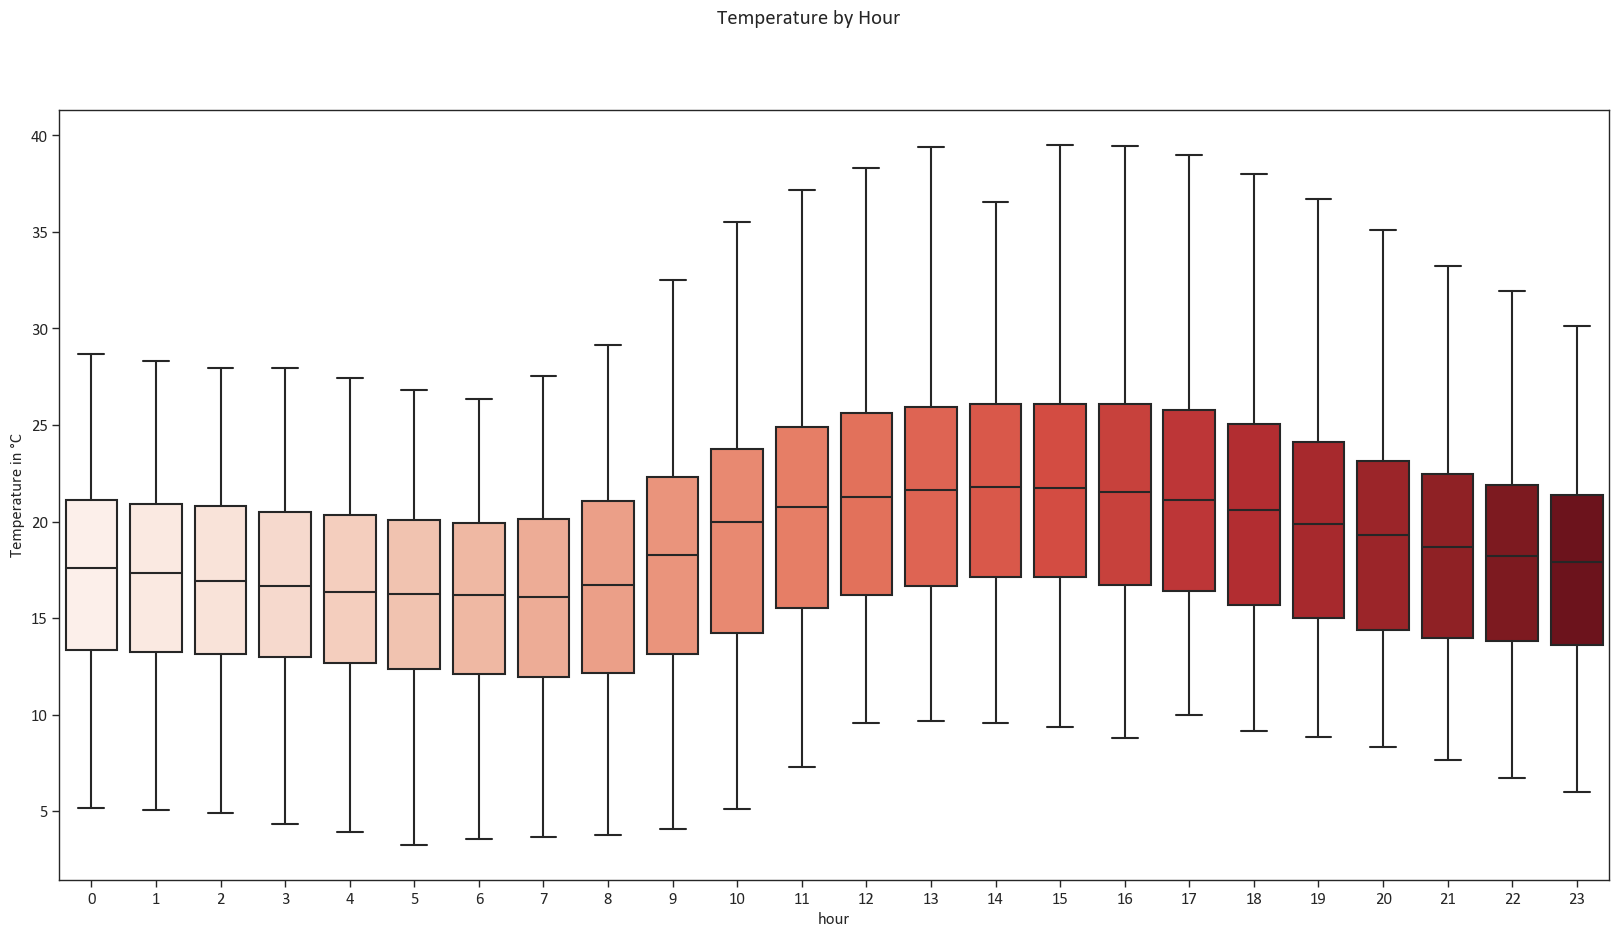

In [37]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.boxplot(data=df, x='hour', y='Temperature', palette = 'Reds', showfliers=False)

plt.suptitle('Temperature by Hour', fontsize=15)
plt.xlabel('hour', fontsize=12)
plt.ylabel('Temperature in °C', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#Generating plot
plt.show()

turns out the power consumption has a major correlation with Temperature as we assumed before

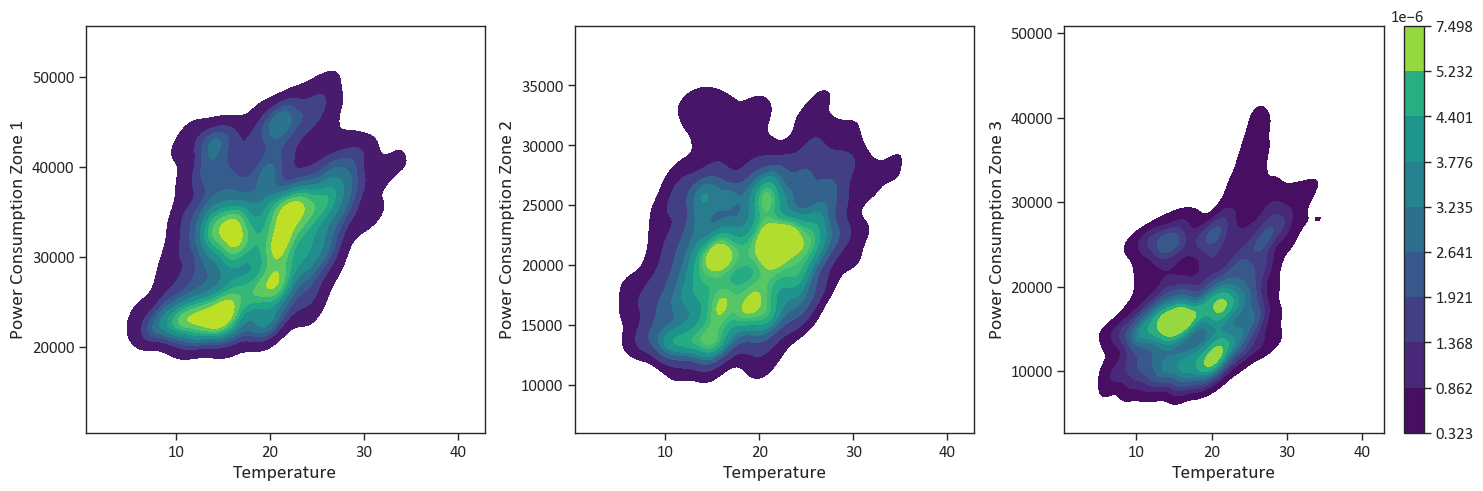

In [35]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Plot the first KDE plot in the first subplot
sns.kdeplot(data=df, x='Temperature', y='PowerConsumption_Zone1', shade=True, cmap='viridis', ax=axes[0])
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Power Consumption Zone 1')

# Plot the second KDE plot in the second subplot
sns.kdeplot(data=df, x='Temperature', y='PowerConsumption_Zone2', shade=True, cmap='viridis', ax=axes[1])
axes[1].set_xlabel('Temperature')
axes[1].set_ylabel('Power Consumption Zone 2')

# Plot the third KDE plot in the third subplot
sns.kdeplot(data=df, x='Temperature', y='PowerConsumption_Zone3', shade=True, cmap='viridis', ax=axes[2],cbar=True)
axes[2].set_xlabel('Temperature')
axes[2].set_ylabel('Power Consumption Zone 3')

plt.tight_layout()  # Adjust layout to prevent label overlapping

# Show the plot
plt.show()


In Tetouan, a city located in the north of Morocco, summer typically occurs from June(6th) to August(8th). During this period, the weather is generally warm to hot, with average high temperatures ranging from 27°C (81°F) to 32°C (90°F).

maybe it checks out. 

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Plot the first KDE plot in the first subplot
sns.kdeplot(data=df, x='Temperature', y='WindSpeed', shade=True, cmap='viridis', ax=axes[0])
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('WindSpeed')

# Plot the second KDE plot in the second subplot
sns.kdeplot(data=df, x='Temperature', y='WindSpeed', shade=True, cmap='viridis', ax=axes[1])
axes[1].set_xlabel('Temperature')
axes[1].set_ylabel('WindSpeed')

# Plot the third KDE plot in the third subplot
sns.kdeplot(data=df, x='Temperature', y='WindSpeed', shade=True, cmap='viridis', ax=axes[2],cbar=True)
axes[2].set_xlabel('Temperature')
axes[2].set_ylabel('WindSpeed')

plt.tight_layout()  # Adjust layout to prevent label overlapping

# Show the plot
plt.show()


well atmost what i can is, when the windspeed is lower the temperature is also lower vice versa

Indexing: Setting the 'Date' column as the DataFrame index allows us to easily access and manipulate the data based on the dates. It enables convenient time-based indexing and slicing, making it easier to perform time series analysis and generate forecasts.

Time Alignment: In time series analysis, it is often crucial to ensure that the data is aligned properly in chronological order. Setting the 'Date' column as the index ensures that the data is correctly aligned based on the chronological order of the dates.

Plotting and Visualization: When the 'Date' column is set as the index, it is automatically used as the x-axis when plotting the data. This helps in creating meaningful and visually appealing time series plots.

# Model Building

In [40]:
#df1 = df1.drop('zone1', axis = 1)

In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52416 entries, 2017-01-01 00:00:00 to 2017-12-30 23:50:00
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature             52416 non-null  float16
 1   Humidity                52416 non-null  float16
 2   WindSpeed               52416 non-null  float16
 3   GeneralDiffuseFlows     52416 non-null  float16
 4   DiffuseFlows            52416 non-null  float16
 5   PowerConsumption_Zone1  52416 non-null  float16
 6   PowerConsumption_Zone2  52416 non-null  float16
 7   PowerConsumption_Zone3  52416 non-null  float16
 8   hour                    52416 non-null  int8   
 9   dayofweek               52416 non-null  int8   
 10  quarter                 52416 non-null  int8   
 11  month                   52416 non-null  int8   
 12  year                    52416 non-null  int16  
 13  dayofyear               52416 non-null  int16  
 14  day

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [52]:
zone1_df = df1.drop(['PowerConsumption_Zone2','PowerConsumption_Zone3'], axis = 1)
zone1_df.columns

Index(['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'PowerConsumption_Zone1', 'hour', 'dayofweek',
       'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear'],
      dtype='object')

In [53]:
zone2_df = df1.drop(['PowerConsumption_Zone1','PowerConsumption_Zone3'], axis = 1)
zone2_df.columns

Index(['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'PowerConsumption_Zone2', 'hour', 'dayofweek',
       'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear'],
      dtype='object')

In [54]:
zone3_df = df1.drop(['PowerConsumption_Zone2','PowerConsumption_Zone1'], axis = 1)
zone3_df.columns

Index(['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'PowerConsumption_Zone3', 'hour', 'dayofweek',
       'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear'],
      dtype='object')

## Split train_test

In [133]:
from sklearn.metrics import classification_report
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics

In [134]:
#pip install xgboost

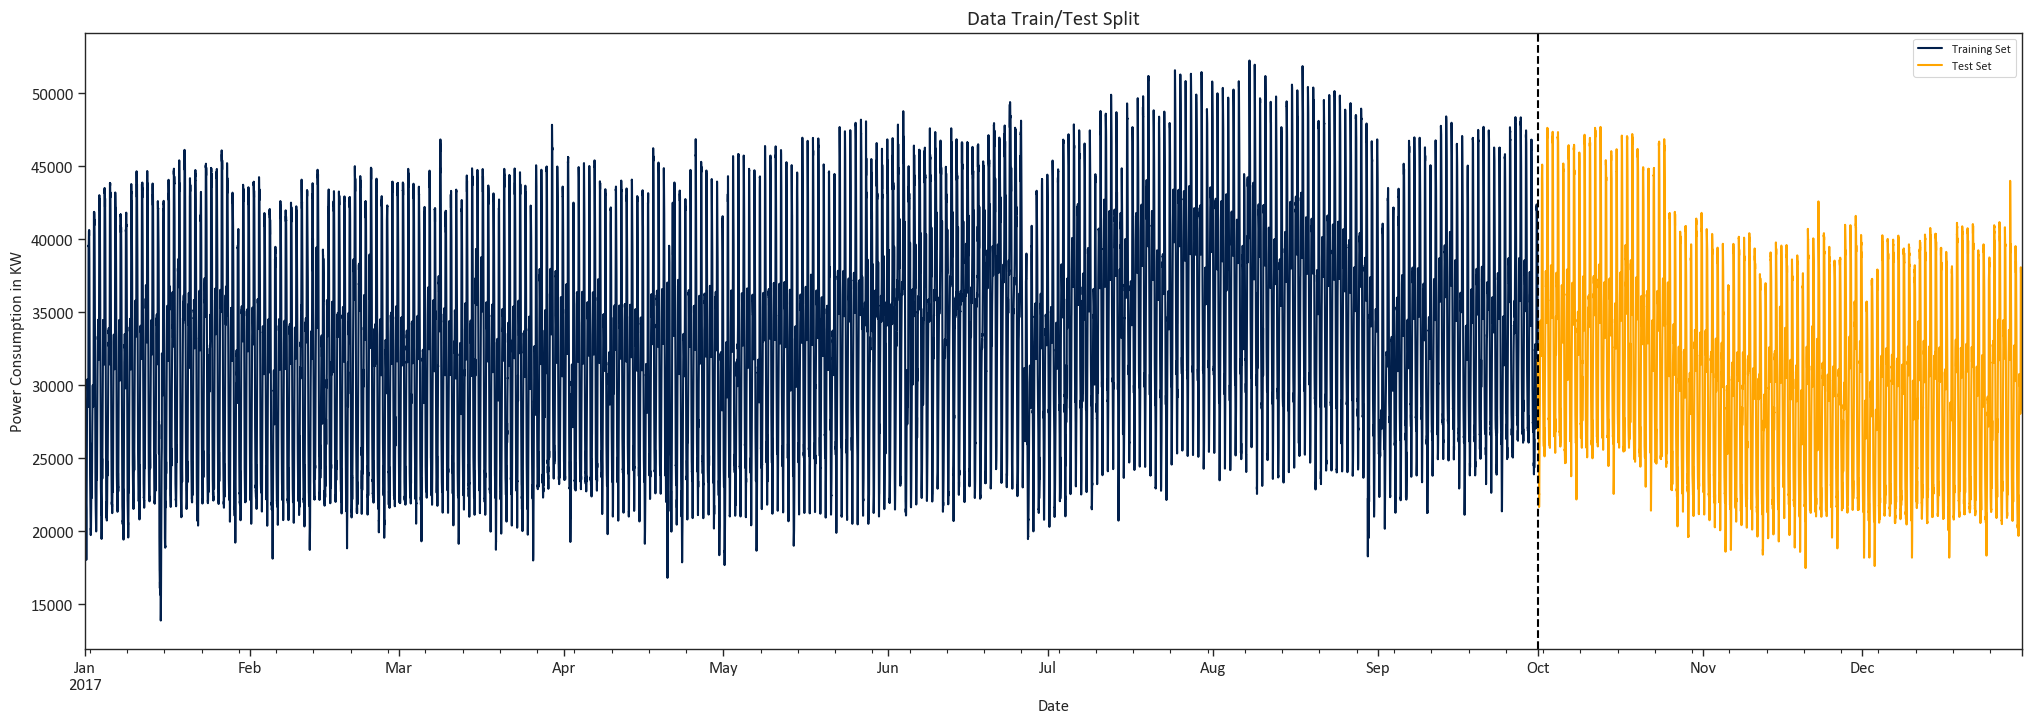

In [71]:
#Train and Test Split
zone_1 = df['PowerConsumption_Zone1']

train = zone_1.loc[zone_1.index < '10-01-2017']
test = zone_1.loc[zone_1.index >= '10-01-2017']

fig, ax = plt.subplots(figsize=(25, 8))

train.plot(ax=ax, label='Training Set', title='Data Train/Test Split', color = "#011f4b")
test.plot(ax=ax, label='Test Set', color="orange")

ax.axvline('10-01-2017', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])

plt.title('Data Train/Test Split', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Power Consumption in KW', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#Generating plot
plt.show()

In [168]:
#Training data goes from 1st January until 30th of September, input variables are all the columns in the dataset apart from Zone 1,2,3 consumption
x_train = df.loc[:'10-01-2017',['Humidity', 'Temperature', 'WindSpeed','dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year','SMA10', 'SMA30', 'SMA15']]
y_train = df.loc[:'10-01-2017', ['PowerConsumption_Zone1']]

#Testing data goes from 1st January until 30th of September, input variables are all the columns in the dataset apart from Zone 1,2,3 consumption
x_test = df.loc['10-01-2017':,['Humidity', 'Temperature', 'WindSpeed','dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year','SMA10', 'SMA30', 'SMA15']]
y_test = df.loc['10-01-2017':, ['PowerConsumption_Zone1']]


In [179]:
#Defining model and fitting
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1500,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.2, 
                       random_state = 48,
                      early_stopping_rounds=1200)

reg.fit(x_train, y_train,         
        eval_set=[(x_train, y_train), (x_test, y_test)],
        verbose=100)

[17:23:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:27076.22003	validation_1-rmse:24738.84702
[100]	validation_0-rmse:937.09388	validation_1-rmse:1779.16132
[200]	validation_0-rmse:815.94541	validation_1-rmse:1764.46960
[300]	validation_0-rmse:758.13705	validation_1-rmse:1708.34707
[400]	validation_0-rmse:714.40991	validation_1-rmse:1686.13165
[500]	validation_0-rmse:683.92050	validation_1-rmse:1668.60984
[600]	validation_0-rmse:659.34171	validation_1-rmse:1646.10677
[700]	validation_0-rmse:639.75384	validation_1-rmse:1652.57055
[800]	validation_0-rmse:622.56719	validation_1-rmse:1677.15210
[900]	validation_0-rmse:606.46808	validation_1-rmse:1665.36024
[1000]	validation_0-rmse:592.20179	validation_1-rmse:1679.33257
[1100]	validation_0-rmse:580.08053	validation_1-rmse:1702.44241
[1200]	val

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=1200,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1500, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [175]:
reg = xgb.XGBRegressor(
    booster='gbtree',
    n_estimators=2000,
    objective='reg:squarederror',
    max_depth=5,
    learning_rate=0.05,
    random_state=48,
    early_stopping_rounds=1500,
)

reg.fit(
    x_train, y_train,
    eval_set=[(x_train, y_train), (x_test, y_test)],
    verbose=100
)


[0]	validation_0-rmse:32113.54856	validation_1-rmse:29405.02672
[100]	validation_0-rmse:891.20139	validation_1-rmse:1624.48838
[200]	validation_0-rmse:766.00324	validation_1-rmse:1714.76348
[300]	validation_0-rmse:710.99407	validation_1-rmse:1714.20269
[400]	validation_0-rmse:668.59061	validation_1-rmse:1710.45359
[500]	validation_0-rmse:635.13026	validation_1-rmse:1691.84819
[600]	validation_0-rmse:608.53616	validation_1-rmse:1672.36611
[700]	validation_0-rmse:586.22436	validation_1-rmse:1674.87523
[800]	validation_0-rmse:567.53521	validation_1-rmse:1659.56741
[900]	validation_0-rmse:547.95020	validation_1-rmse:1652.94820
[1000]	validation_0-rmse:532.50559	validation_1-rmse:1651.27793
[1100]	validation_0-rmse:520.78217	validation_1-rmse:1642.80044
[1200]	validation_0-rmse:508.82818	validation_1-rmse:1636.82097
[1300]	validation_0-rmse:497.72713	validation_1-rmse:1646.81289
[1400]	validation_0-rmse:488.42692	validation_1-rmse:1649.98255
[1500]	validation_0-rmse:478.80657	validation_1-r

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=1500,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=2000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=48, ...)

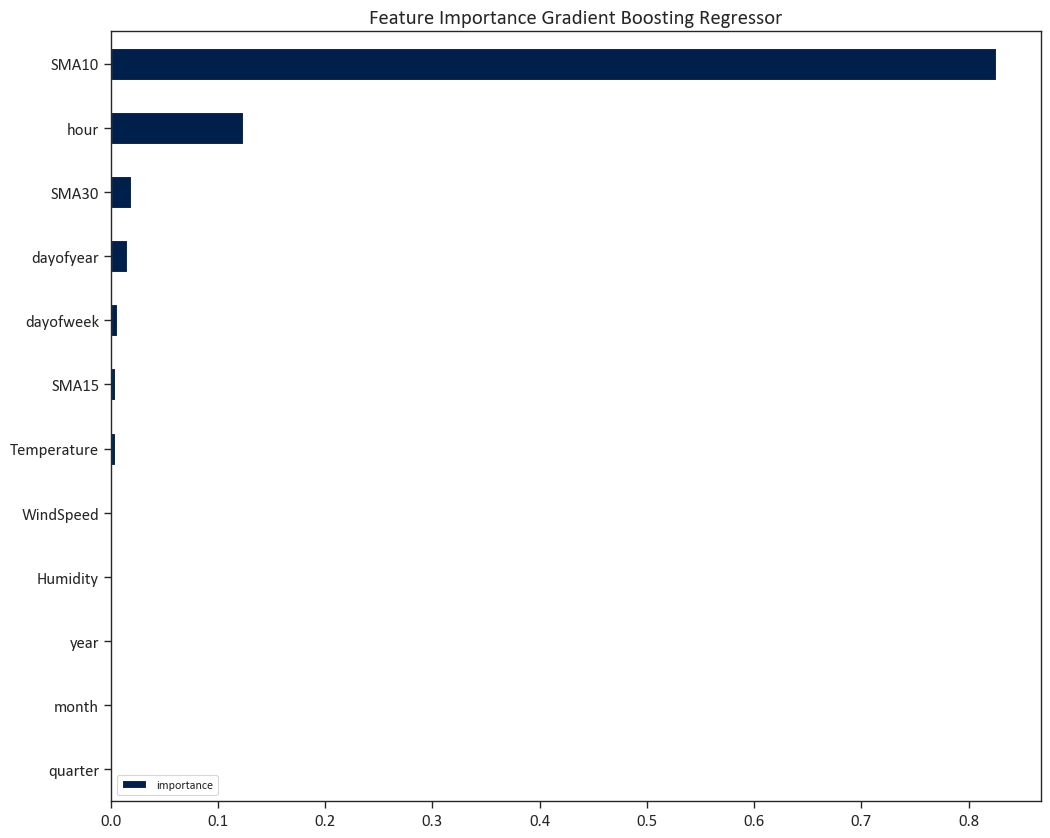

In [155]:
##Assessing Feature Importance
fi = pd.DataFrame(data=reg.feature_importances_,
             index=x_train.columns,
             columns=['importance'])

fi.sort_values('importance').plot(kind='barh', title='Feature Importance', color = "#011f4b", figsize=(12,10))
plt.title('Feature Importance Gradient Boosting Regressor', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#Generating plot
plt.show()

In [156]:
##Merging predictions with original dataset
y_test = pd.DataFrame(y_test)
y_test['prediction'] = reg.predict(X_test)
df = df.merge(y_test[['prediction']], how='left', left_index=True, right_index=True)

df.tail()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,SMA10,SMA15,SMA30,prediction
Datetime,,,,,,,,,,,,,,,,,,,,
2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212,23,5,4,12,2017,364,30,52,33634.068441,34403.447401,35936.121673,31450.109375
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152,23,5,4,12,2017,364,30,52,33217.946768,33990.570342,35683.041825,31481.845703
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259,23,5,4,12,2017,364,30,52,32730.038022,33540.380227,35402.382763,31224.535156
2017-12-30 23:40:00,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504,23,5,4,12,2017,364,30,52,32133.840303,33082.078579,35107.528517,30848.972656
2017-12-30 23:50:00,6.580,74.1,0.081,0.062,0.111,28349.80989,24055.23167,13345.49820,23,5,4,12,2017,364,30,52,31495.057033,32597.820025,34796.451204,29363.640625


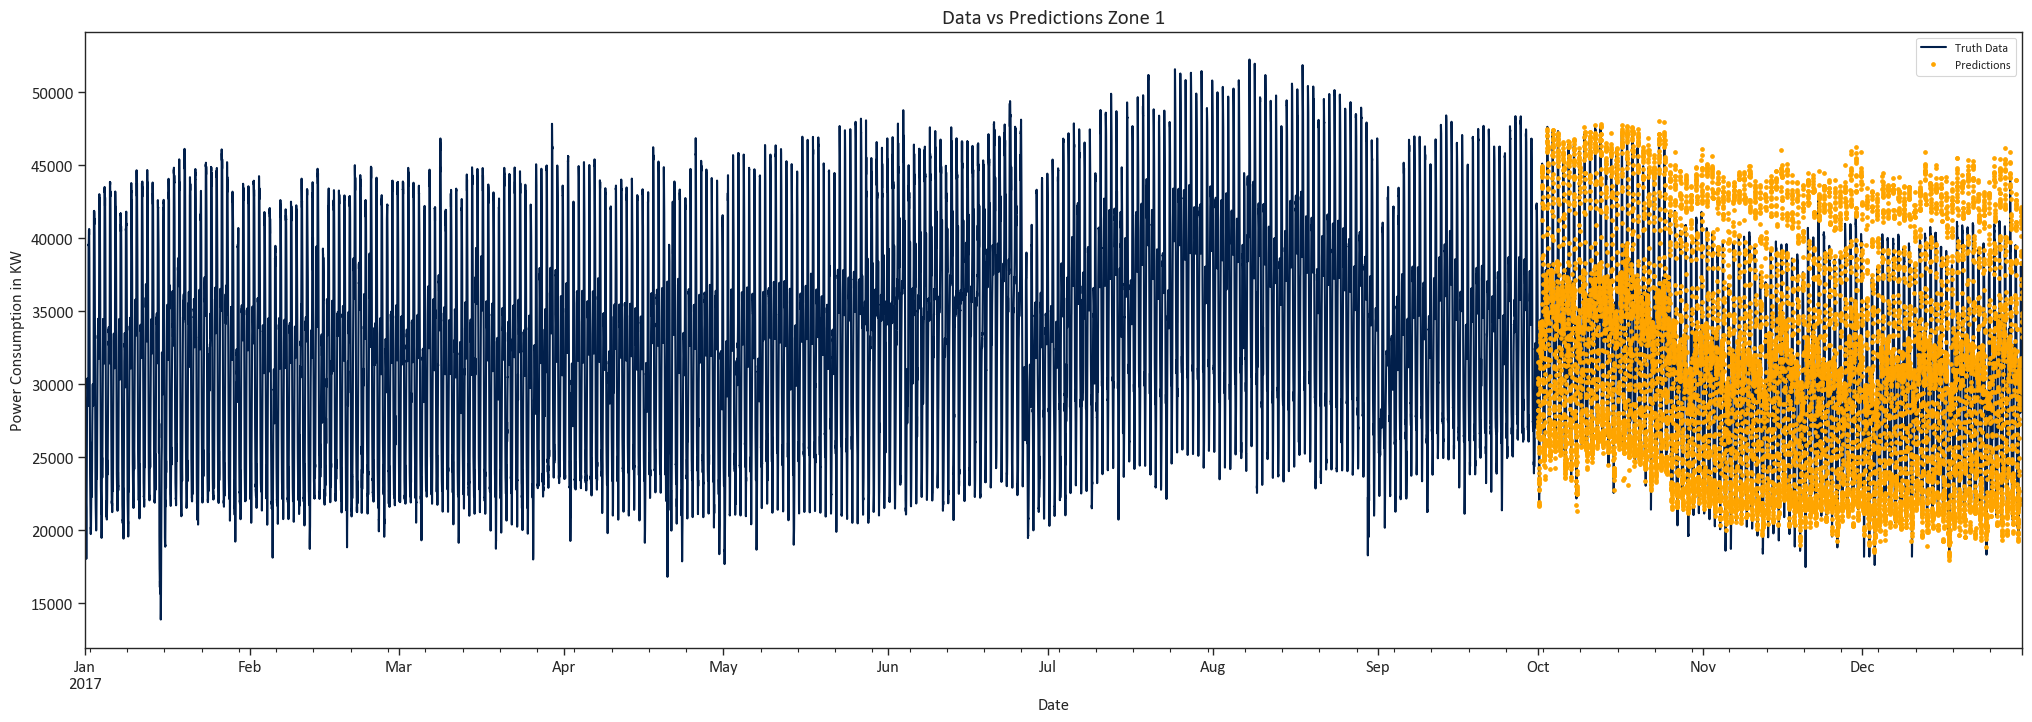

In [157]:
##Printing predictions on chart to visually assess accuracy
ax = df[['PowerConsumption_Zone1']].plot(figsize=(25, 8), color = "#011f4b")
y_test['prediction'].plot(ax=ax, style='.', color = "orange")
plt.legend(['Truth Data', 'Predictions'])

plt.title('Data vs Predictions Zone 1', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Power Consumption in KW', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

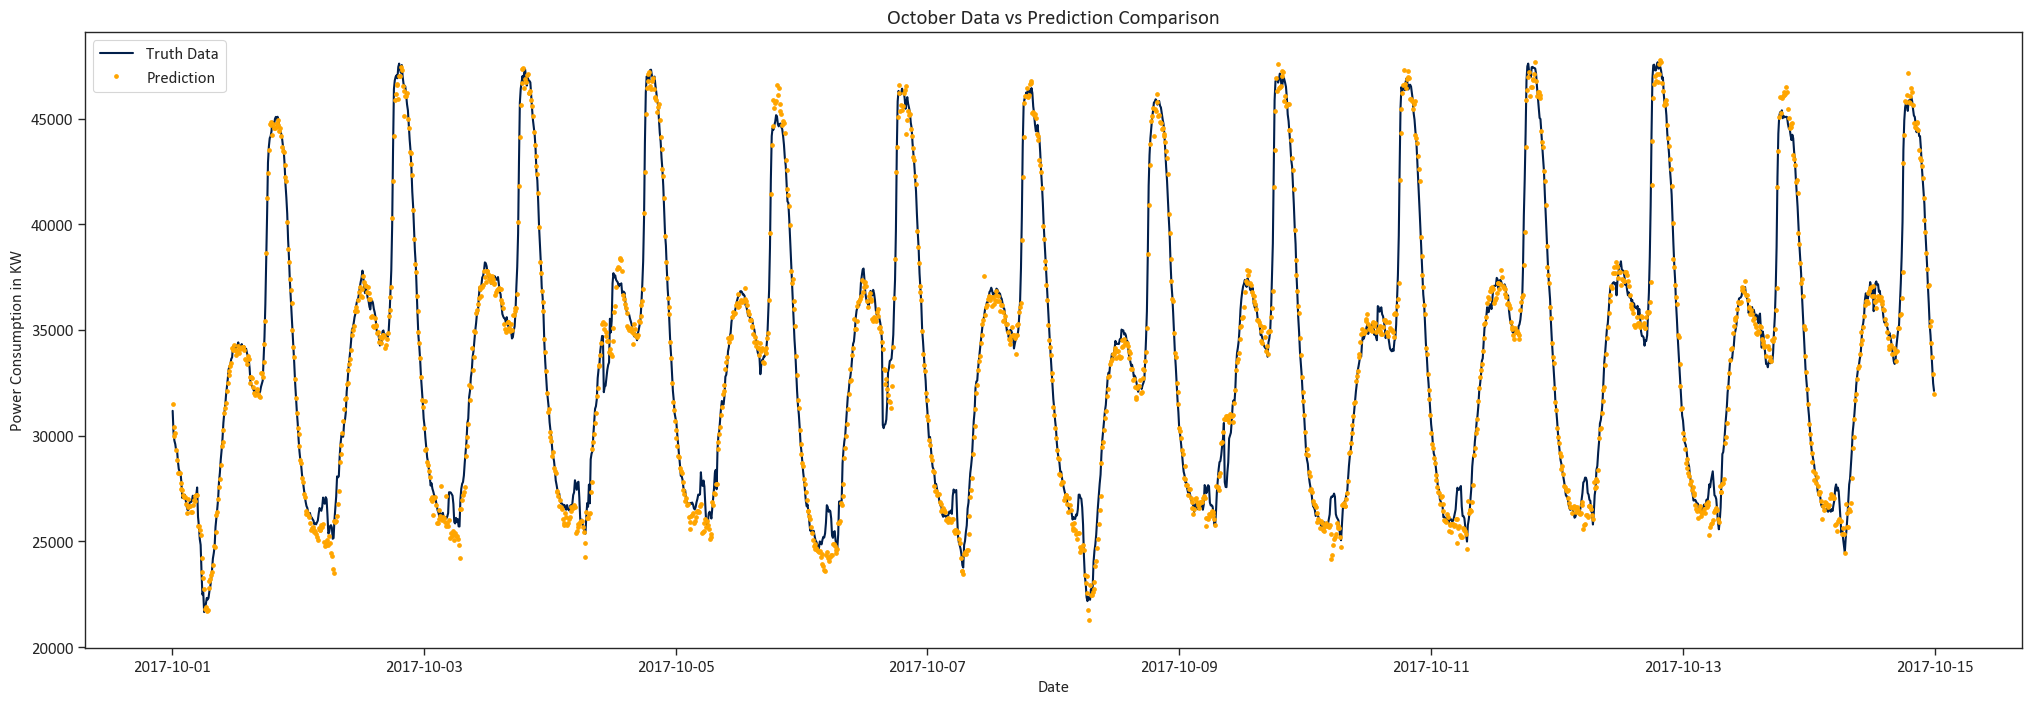

In [159]:


october_data = df.loc[(df.index > '10-01-2017') & (df.index < '10-15-2017')]

fig, ax = plt.subplots(figsize=(25, 8))

ax.plot(october_data.index, october_data['PowerConsumption_Zone1'], color="#011f4b", label='Truth Data')
ax.plot(october_data.index, october_data['prediction'], '.', color="orange", label='Prediction')

ax.set_title('October Data vs Prediction Comparison', fontsize=15)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Power Consumption in KW', fontsize=12)
ax.tick_params(axis='both', labelsize=12)
ax.legend(fontsize=12)

plt.show()


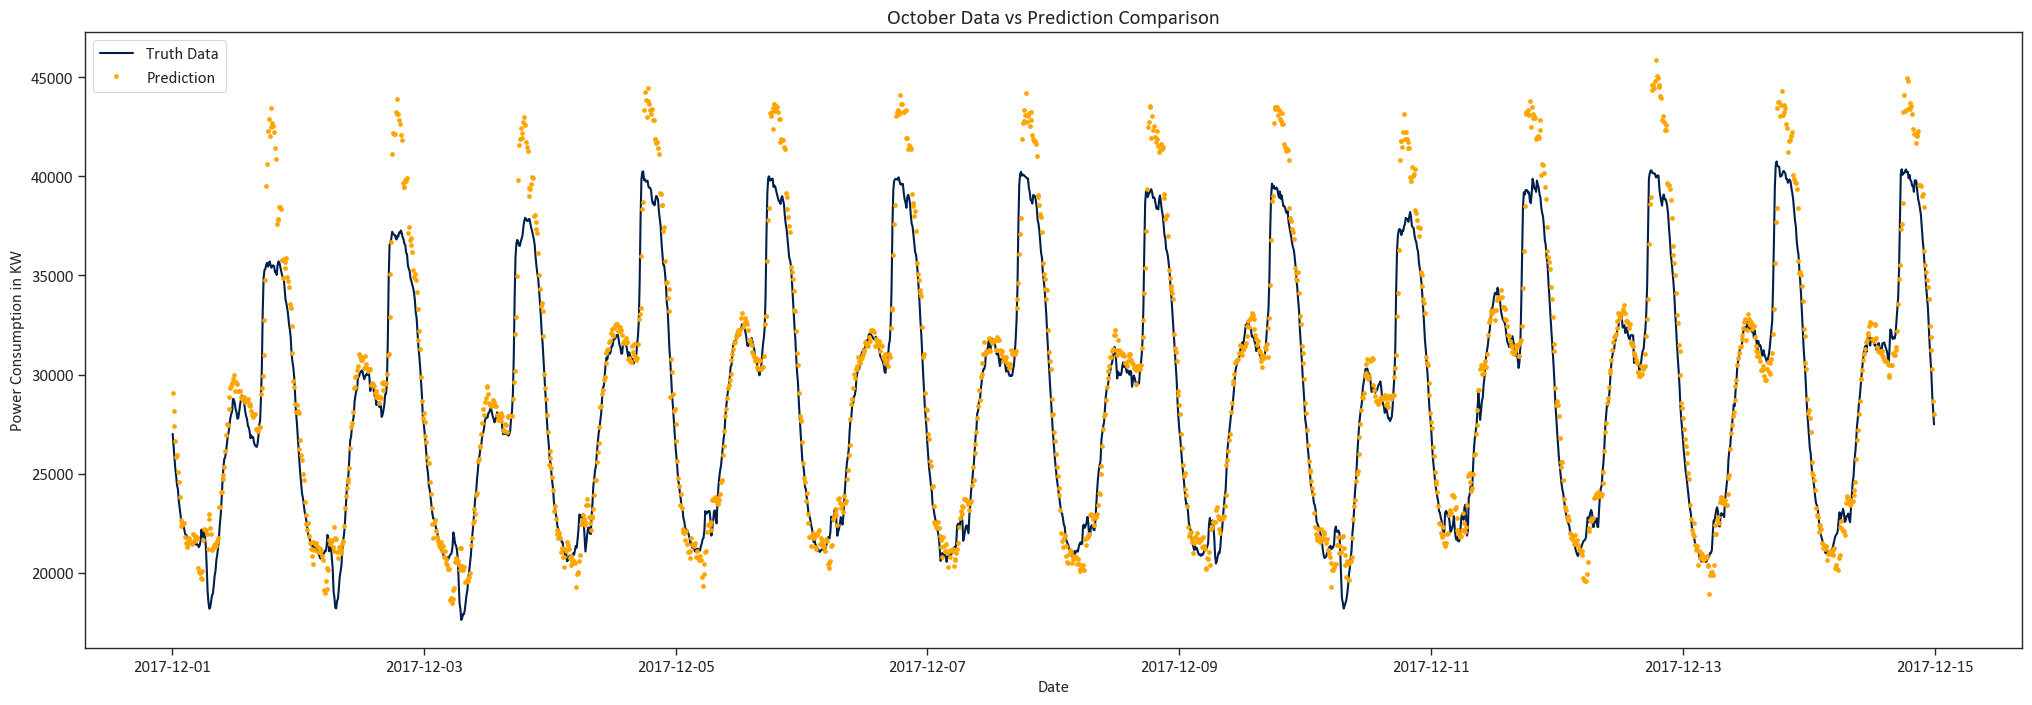

In [160]:
import matplotlib.pyplot as plt

october_data = df.loc[(df.index > '12-01-2017') & (df.index < '12-15-2017')]

fig, ax = plt.subplots(figsize=(25, 8))

ax.plot(october_data.index, october_data['PowerConsumption_Zone1'], color="#011f4b", label='Truth Data')
ax.plot(october_data.index, october_data['prediction'], '.', color="orange", label='Prediction')

ax.set_title('October Data vs Prediction Comparison', fontsize=15)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Power Consumption in KW', fontsize=12)
ax.tick_params(axis='both', labelsize=12)
ax.legend(fontsize=12)

plt.show()


In [161]:
##Function to calculate regression metrics, evaluating accuracy
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    mape = (1- metrics.mean_absolute_percentage_error(y_true, y_pred))


    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print('MAPE: ', round(mape,4))

In [162]:
regression_results(y_test['PowerConsumption_Zone1'], y_test['prediction'])


explained_variance:  0.9478
mean_squared_log_error:  0.0021
r2:  0.9427
MAE:  1025.6429
MSE:  2389926.6135
RMSE:  1545.9387
MAPE:  0.9671


### References
[1] Salam, A., & El Hibaoui, A. (2018, December). Comparison of Machine Learning Algorithms for the Power Consumption Prediction:-Case Study of Tetouan city–. In 2018 6th International Renewable and Sustainable Energy Conference (IRSEC) (pp. 1–5). IEEE.

[2] robikscube. (2022, July 5). Time Series Forecasting with Machine Learning [YT]. Retrieved September 29, 2022, from Kaggle.com website: [https://www.kaggle.com/code/robikscube/time-series-forecasting-with-machine-learning-yt]